In [1]:
#conda list -e > requirements.txt

# Import Libraries

In [1]:
import cv2
import face_recognition
import glob
import matplotlib.pyplot as plt

# Prepare Dataset

In [2]:
image_encodings = []
persons = []

In [3]:
paths = glob.glob("../data/images/*.jpg")
for path in paths:
    name = path.split("/")[-1].split(".")[0]
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_encoding = face_recognition.face_encodings(rgb_img)[0]
    image_encodings.append(img_encoding)
    persons.append(name)

In [4]:
def detect_known_faces(img, image_encodings = image_encodings, persons = persons):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fc = []
    fn = []
    face_locations = face_recognition.face_locations(rgb_img)
    face_encodings = face_recognition.face_encodings(rgb_img, face_locations)
    for face_encoding,face_location in zip(face_encodings,face_locations):
        matches = face_recognition.compare_faces(image_encodings, face_encoding)
        name = "Unknown"
        if True in matches:
            first_match_index = matches.index(True)
            name = persons[first_match_index]
        fc.append(face_location)
        fn.append(name)
    return fc,fn

[(56, 235, 146, 145)] ['Jim Carrey']


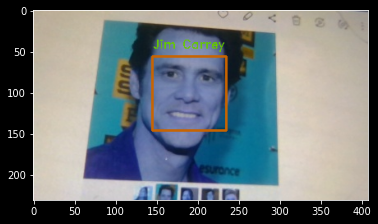

In [5]:
frame = cv2.imread("../data/images/Jim Carrey.jpg")
face_locations, face_names = detect_known_faces(frame)
print(face_locations, face_names)
for face_loc, name in zip(face_locations, face_names):
    y1, x2, y2, x1 = face_loc
    cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (100, 200, 0), 1)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (200, 100, 0), 2)
    #cv2.imshow("Frame", frame)
    plt.imshow(frame)

# Face recognition with camera

In [14]:
# Load Camera
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    # Detect Faces
    face_locations, face_names = detect_known_faces(frame)
    for face_loc, name in zip(face_locations, face_names):
        y1, x2, y2, x1 = face_loc
        cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 200), 4)
        cv2.imshow("Frame", frame)
    key = cv2.waitKey(1)
    if key == 27 or key == ord('q'):
        break
cv2.destroyAllWindows()
cap.release()

# Save Encodings and names in file

In [6]:
image_encodings[0]

array([-0.09382541,  0.03073779,  0.06115435,  0.02006704,  0.00157085,
       -0.03459626, -0.0257522 , -0.11288699,  0.13377611, -0.06814083,
        0.20266689, -0.03160058, -0.11465585, -0.07826648, -0.02798647,
        0.10108041, -0.12197312, -0.08726702, -0.11040178, -0.05838553,
       -0.01159414,  0.05430112,  0.00952863, -0.02160667, -0.10952617,
       -0.28385374, -0.10548601, -0.08424753,  0.09768488,  0.0223899 ,
       -0.03608264,  0.00848038, -0.22133031, -0.12009472,  0.08739158,
        0.09828403, -0.04293597, -0.05911786,  0.15996322,  0.03743342,
       -0.19875368,  0.06160089, -0.00533516,  0.27945346,  0.23163955,
        0.03060817, -0.03846151, -0.1252553 ,  0.12279503, -0.13849139,
        0.08710687,  0.125679  ,  0.12739816,  0.08951966,  0.04551289,
       -0.08653986,  0.02936073,  0.14975366, -0.12920797, -0.01108121,
        0.05699239, -0.05527975,  0.02457913, -0.08748572,  0.14389357,
        0.08181532, -0.09045109, -0.1840854 ,  0.11549924, -0.14

In [7]:
type(image_encodings[0])

numpy.ndarray

In [8]:
import pandas as pd
df = pd.DataFrame({"Persons":persons, "Encodings":image_encodings})
df.to_csv("../data/encodings/encodings.csv", index=False)

In [9]:
saved_df = pd.read_csv("../data/encodings/encodings.csv")
en = saved_df["Encodings"]
n = saved_df["Persons"]

# Test after saving Encodings

In [11]:
import numpy as np
e = []
for i in en:
    e.append(np.fromstring(i[1:-1], dtype=float, sep=' '))

In [12]:
type(e[0])

numpy.ndarray

[(80, 179, 155, 104)] ['Indrashis Paul']
Indrashis Paul


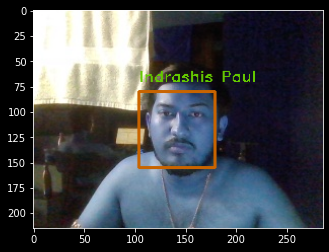

In [13]:
frame = cv2.imread("../data/images/Indrashis Paul.jpg")
face_locations, face_names = detect_known_faces(frame, image_encodings = e, persons = n)
print(face_locations, face_names)
for face_loc, name in zip(face_locations, face_names):
    y1, x2, y2, x1 = face_loc
    print(name)
    cv2.putText(frame, name,(x1, y1 - 10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (100, 200, 0), 1)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (200, 100, 0), 2)
    #cv2.imshow("Frame", frame)
    plt.imshow(frame)